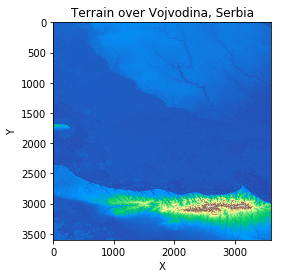

Design matrix shape: (3601, 36)
[[84.30385658 84.39599348 84.29899119 ... 75.82664647 75.90523033
  75.90440243]
 [84.34973355 84.4425151  84.34934546 ... 75.96966845 76.04621248
  76.04451825]]
R2 score 3rd order, 3rd order: 0.5653879499374854
Mean squared error: 814.1190511704415


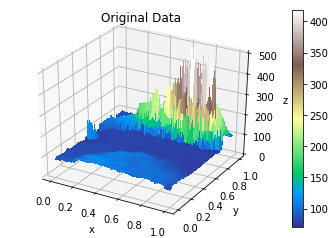

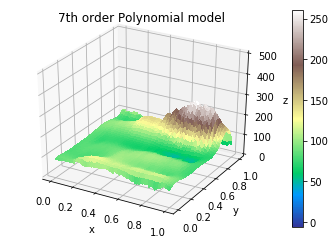

In [90]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

# Load the terrain
terrain = imread('Temerin.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Vojvodina, Serbia')
plt.imshow(terrain, cmap='terrain')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

import imageio

im_data = imageio.imread('Temerin.tif')

# Reduce the number of points for faster calculation (361x361 instead of 3610x3610)
data = im_data[0::1,0::1]

np.random.seed(0)

x = np.arange(0, 1, 1/np.size(data,1))
y = np.arange(0, 1, 1/np.size(data,1))

xx, yy = np.meshgrid(x,y)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

z = data

poly3 = PolynomialFeatures(degree=7)
Xdes3 = poly3.fit_transform(np.c_[x.reshape(-1,1), y.reshape(-1,1)])

print('Design matrix shape:', Xdes3.shape)

ols3 = LinearRegression()
ols3.fit(Xdes3,z)

n_row = np.size(data,1)

ax_row = np.random.rand(n_row)
ax_col = np.random.rand(n_row)

sort_inds_row = np.argsort(ax_row)
sort_inds_col = np.argsort(ax_col)

ROW = ax_row[sort_inds_row]
COL = ax_col[sort_inds_col]

ROWp, COLp = np.meshgrid(ROW, COL)

X3plot = poly3.fit_transform(np.c_[ROW.reshape(-1,1), COL.reshape(-1,1)])

Zpredict3 = ols3.predict(X3plot)
Zpredict4 = ols4.predict(X4plot)
Zpredict5 = ols5.predict(X5plot)

print(ols3.predict(X3plot[:2,:]))

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

surf1 = ax1.plot_surface(xx, yy, data, linewidth = 0, antialiased = False, cmap=cm.terrain)
ax1.set_title('Original Data')
ax1.set_zlim(0, 500)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
fig1.colorbar(surf1)

fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')

surf3 = ax3.plot_surface(ROWp, COLp, Zpredict3.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.terrain)
ax3.set_title('7th order Polynomial model')
ax3.set_zlim(0, 500)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
fig3.colorbar(surf3)

print('R2 score 3rd order, 3rd order:', r2_score(z,Zpredict3))
print("Mean squared error:", mean_squared_error(z,Zpredict3))